## Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

## Reading The Data

In [2]:
data_dir = '../input/bitcoin-prediction-dataset-bullrun/BTC_USD_Price_Prediction_Data.csv'
df = pd.read_csv(data_dir)

## Data Exploration

In [3]:
df.head()

,Unnamed: 0,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,0,BTC,2014-03-14,124.65499,125.30466,125.75166,123.56349
1,1,BTC,2014-03-15,126.45500,124.65499,126.75850,124.63383
2,2,BTC,2014-03-16,109.58483,126.45500,126.66566,84.32833
3,3,BTC,2014-03-17,119.67466,109.58483,119.67500,108.05816
4,4,BTC,2014-03-18,122.33866,119.67466,122.93633,119.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2787 non-null   int64  
 1   Currency             2787 non-null   object 
 2   Date                 2787 non-null   object 
 3   Closing Price (USD)  2787 non-null   float64
 4   24h Open (USD)       2787 non-null   float64
 5   24h High (USD)       2787 non-null   float64
 6   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 152.5+ KB


In [5]:
df.describe()

,Unnamed: 0,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000
mean,1393.000000,6530.845141,6514.579485,6711.061683,6303.417386
std,804.681925,10887.847444,10863.800772,11206.779756,10475.811252
min,0.000000,109.584830,109.584830,119.675000,84.328330
25%,696.500000,461.087500,460.400500,470.720995,451.818830
50%,1393.000000,2781.182500,2773.367500,2875.696250,2697.457500
75%,2089.500000,8507.923720,8497.887593,8764.291985,8222.060570
max,2786.000000,63347.789035,63563.673545,64802.787870,62095.632914


### Set Date column as an index

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)

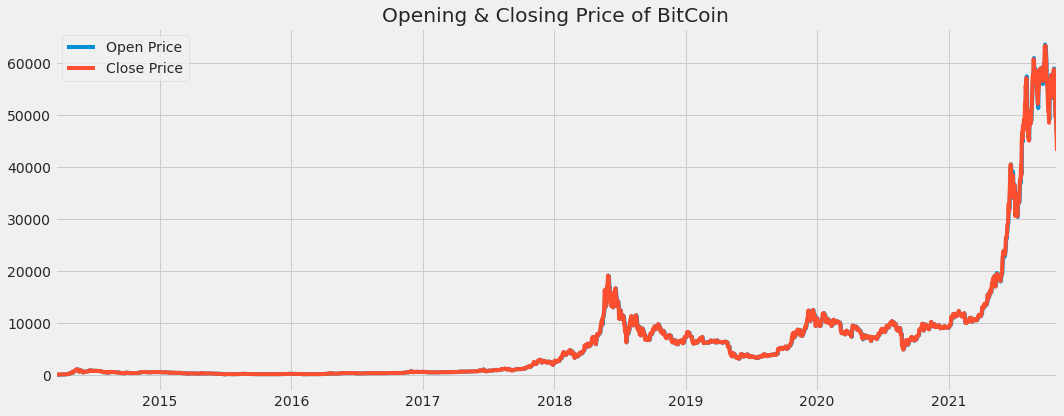

In [7]:
plt.figure(figsize=(15, 6))
df[r'24h Open (USD)'].plot()
df[r'Closing Price (USD)'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of BitCoin")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

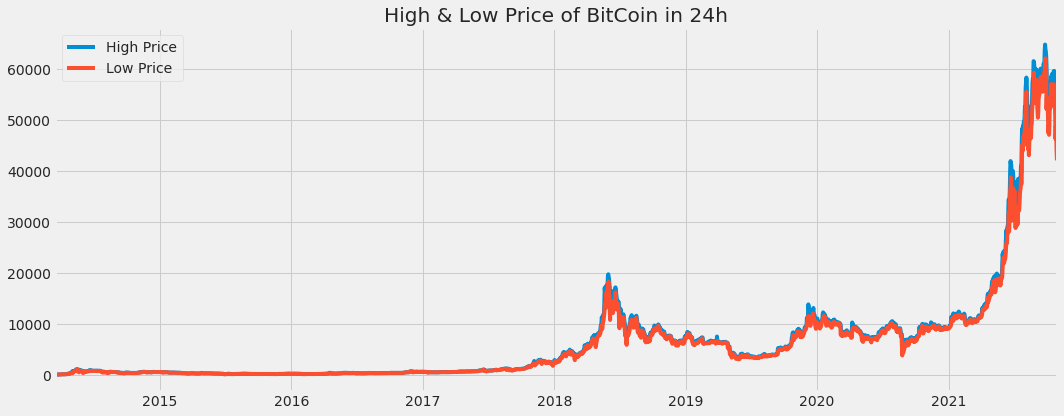

In [8]:
plt.figure(figsize=(15, 6))
df[r'24h High (USD)'].plot()
df[r'24h Low (USD)'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("High & Low Price of BitCoin in 24h")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

## Data Preprocessing

### Choosing Prediction Column

In [9]:
n_cols = 1
dataset = df[r"Closing Price (USD)"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape


(2787, 1)

### Normalizing Data

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

### Splitting the Data

In [11]:
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2090 Test Size : 697


In [12]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2090, 1)

### Creating training set

In [13]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[0.00023831],
       [0.00026677],
       [0.        ],
       [0.00015955],
       [0.00020168],
       [0.00019087],
       [0.0002089 ],
       [0.00022847],
       [0.00024454],
       [0.00027478],
       [0.000264  ],
       [0.00027424],
       [0.00028145],
       [0.00042154],
       [0.0003893 ],
       [0.00054047],
       [0.00046394],
       [0.00054345],
       [0.00069526],
       [0.0008184 ],
       [0.00088127],
       [0.00109188],
       [0.00126051],
       [0.00145666],
       [0.00113492],
       [0.00105074],
       [0.00109288],
       [0.00124252],
       [0.00133103],
       [0.00140445],
       [0.00138271],
       [0.00141471],
       [0.00142869],
       [0.00145416],
       [0.00160856],
       [0.00184122],
       [0.00220861],
       [0.00243115],
       [0.00293971],
       [0.00351873],
       [0.00280373],
       [0.00310564],
       [0.00362996],
       [0.00393584],
       [0.00465493],
       [0.00475217],
       [0.0049279 ],
  

In [14]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [16]:
x_train.shape , y_train.shape

((2030, 60, 1), (2030, 1))

## LSTM Model

### Model Dtructure

In [17]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

2022-11-13 11:58:54.488171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 11:58:54.497188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 11:58:54.497937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 11:58:54.499171: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [19]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100


2022-11-13 11:58:55.974816: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-13 11:58:58.680715: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


64/64 [==============================] - 4s 7ms/step - loss: 3.4263e-04 - mean_absolute_error: 0.0106
Epoch 2/100
64/64 [==============================] - 0s 7ms/step - loss: 7.9031e-05 - mean_absolute_error: 0.0049
Epoch 3/100
64/64 [==============================] - 0s 7ms/step - loss: 7.5199e-05 - mean_absolute_error: 0.0052
Epoch 4/100
64/64 [==============================] - 0s 7ms/step - loss: 7.3347e-05 - mean_absolute_error: 0.0056
Epoch 5/100
64/64 [==============================] - 0s 7ms/step - loss: 5.8452e-05 - mean_absolute_error: 0.0046
Epoch 6/100
64/64 [==============================] - 0s 7ms/step - loss: 5.6258e-05 - mean_absolute_error: 0.0046
Epoch 7/100
64/64 [==============================] - 0s 7ms/step - loss: 5.8816e-05 - mean_absolute_error: 0.0052
Epoch 8/100
64/64 [==============================] - 0s 7ms/step - loss: 5.8333e-05 - mean_absolute_error: 0.0046
Epoch 9/100
64/64 [==============================] - 1s 9ms/step - loss: 4.9001e-05 - mean_absolute_

### Model Evaluation

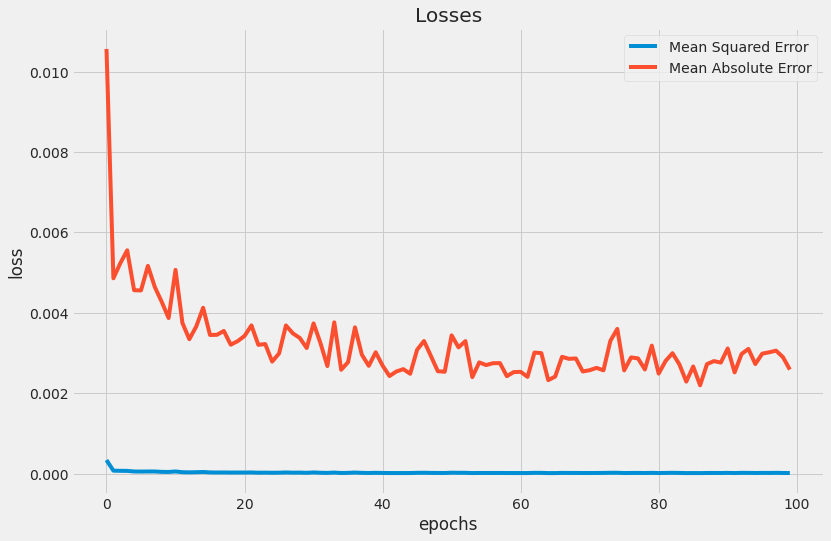

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predection

### Creating testing set

In [21]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [22]:
x_test.shape , y_test.shape

((697, 60, 1), (697, 1))

In [23]:
# Get Prediction
predictions = model.predict(x_test)

In [24]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(697, 1)

### Root mean square error

In [25]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

994.36

In [26]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,9370.161133,9907.407965
1,9705.206055,10462.412169
2,10224.671875,10844.570975
3,10608.384766,10997.459750
4,10768.652344,11666.409684
...,...,...
692,47122.632812,49765.132082
693,45116.636719,50033.693137
694,45869.570312,47886.625255
695,43787.089844,45605.615754


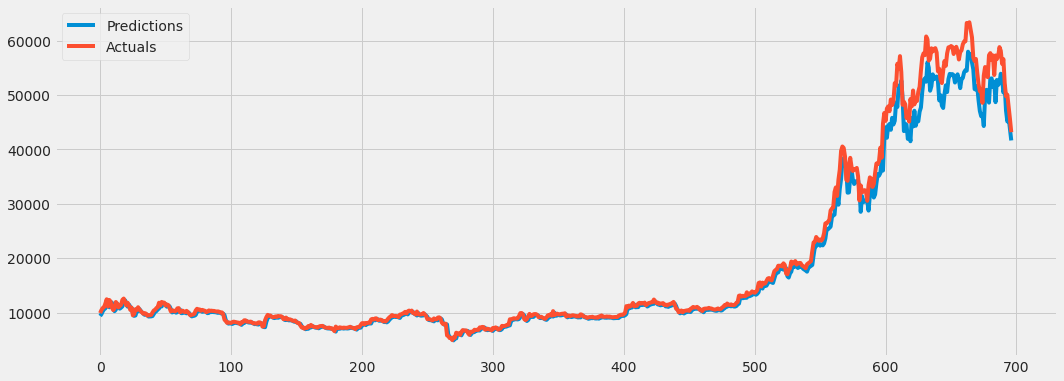

In [27]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

### Visualize Predictions with The Data
for one feature

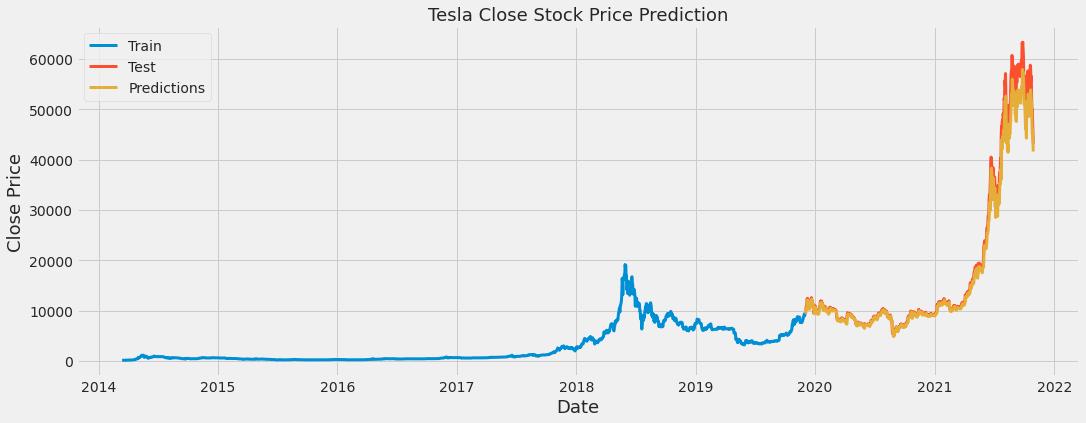

In [28]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train[r'Closing Price (USD)'], linewidth= 3)
plt.plot(test[r'Closing Price (USD)'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# Multivariate Predection 

In [29]:
df.head()

,Unnamed: 0,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2014-03-14,0,BTC,124.65499,125.30466,125.75166,123.56349
2014-03-15,1,BTC,126.45500,124.65499,126.75850,124.63383
2014-03-16,2,BTC,109.58483,126.45500,126.66566,84.32833
2014-03-17,3,BTC,119.67466,109.58483,119.67500,108.05816
2014-03-18,4,BTC,122.33866,119.67466,122.93633,119.00566


In [30]:
list(df)[2:]

['Closing Price (USD)', '24h Open (USD)', '24h High (USD)', '24h Low (USD)']

In [31]:
n_cols = 4
cols = list(df)[2:]
dataset = df[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(2787, 4)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [33]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 2090 Test Size : 697


In [34]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2090, 4)

In [35]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 4

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)

X_train:  [array([[2.38307842e-04, 2.47735494e-04, 9.39450767e-05, 6.32709798e-04],
       [2.66771807e-04, 2.37497068e-04, 1.09510809e-04, 6.49970199e-04],
       [0.00000000e+00, 2.65864192e-04, 1.08075504e-04, 0.00000000e+00],
       [1.59552760e-04, 0.00000000e+00, 0.00000000e+00, 3.82669421e-04],
       [2.01679193e-04, 1.59009927e-04, 5.04201152e-05, 5.59209812e-04],
       [1.90873542e-04, 2.00993037e-04, 4.91188482e-05, 6.00312641e-04],
       [2.08895401e-04, 1.90224149e-04, 5.12755162e-05, 5.98337033e-04],
       [2.28472174e-04, 2.08184693e-04, 7.67613026e-05, 6.13151590e-04],
       [2.44538411e-04, 2.27694862e-04, 9.44373226e-05, 6.33180196e-04],
       [2.74775829e-04, 2.43706439e-04, 1.44424558e-04, 6.52966911e-04],
       [2.63999116e-04, 2.73840983e-04, 1.19995153e-04, 6.57710723e-04],
       [2.74243556e-04, 2.63100934e-04, 1.13808685e-04, 6.41839908e-04],
       [2.81451699e-04, 2.73310520e-04, 1.27104272e-04, 6.76460047e-04],
       [4.21535689e-04, 2.80494139e-04, 

In [36]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [38]:
x_train.shape , y_train.shape

((2030, 60, 4), (2030, 4))

In [39]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model2.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [40]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            11000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 43,116
Trainable params: 43,116
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
64/64 [==============================] - 3s 8ms/step - loss: 4.0445e-04 - mean_absolute_error: 0.0119
Epoch 2/100
64/64 [==============================] - 0s 7ms/step - loss: 1.0377e-04 - mean_absolute_error: 0.0060
Epoch 3/100
64/64 [==============================] - 0s 7ms/step - loss: 7.6467e-05 - mean_absolute_error: 0.0048
Epoch 4/100
64/64 [==============================] - 0s 7ms/step - loss: 6.4552e-05 - mean_absolute_error: 0.0044
Epoch 5/100
64/64 [==============================] - 0s 7ms/step - loss: 6.3643e-05 - mean_absolute_error: 0.0046
Epoch 6/100
64/64 [==============================] - 0s 7ms/step - loss: 5.3439e-05 - mean_absolute_error: 0.0042
Epoch 7/100
64/64 [==============================] - 0s 7ms/step - loss: 4.7226e-05 - mean_absolute_error: 0.0039
Epoch 8/100
64/64 [==============================] - 0s 7ms/step - loss: 6.1009e-05 - mean_absolute_error: 0.0049
Epoch 9/100
64/64 [==============================] - 0s 7ms/step - loss: 4.0909e-05 - me

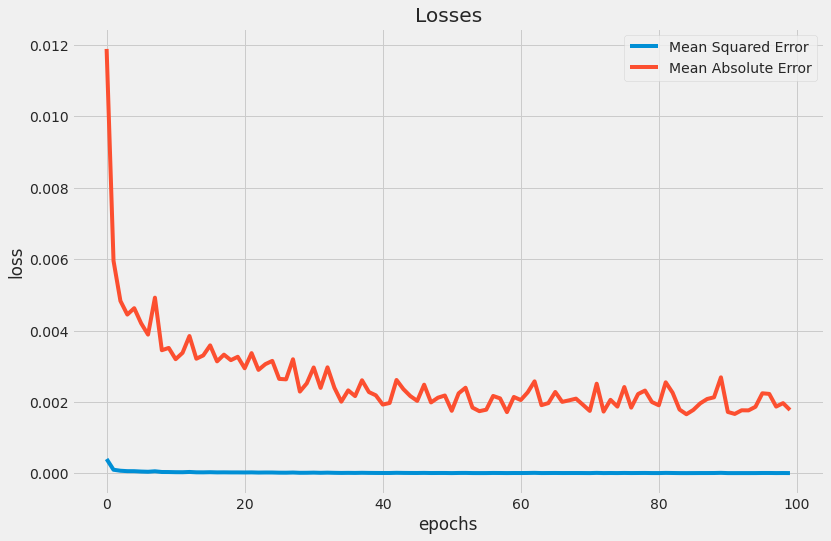

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(history2.history["loss"])
plt.plot(history2.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [43]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

In [44]:
x_test = []
y_test = []
n_cols = 4

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))


In [45]:
x_test.shape , y_test.shape

((697, 60, 4), (697, 4))

In [46]:
# Get Prediction
predictions = model2.predict(x_test)

In [47]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(697, 4)

In [48]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [49]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE


1096.42